In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mongodb_create_n_read import *
from pymongo import MongoClient
import seaborn as sns

In [2]:
def to_csv(shows):
    df = pd.DataFrame(shows)
    df.to_csv('dump.csv', index=False)

to_csv(export_to_mongo())

In [3]:
client = MongoClient(URLmongo)
db = client.indeed_db
collection = db.indeed_collection

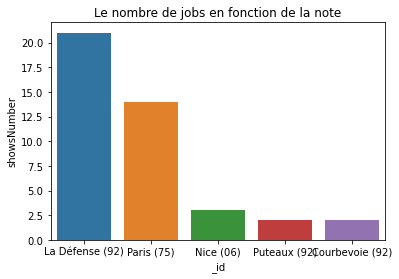

In [18]:
cur = collection.aggregate([{"$group" :
                                 {"_id" : "$cityName",
                                  "showsNumber" :
                                      {"$sum" : 1}
                                  }},
                                {'$sort':{'showsNumber':-1}},
                            {'$limit':5}])
df = pd.DataFrame(list(cur))
plt.title('Le nombre de postes en fonction de la ville')
sns.barplot(x='_id',y='showsNumber',data=df)
plt.savefig("job_per_note.png")
plt.show()


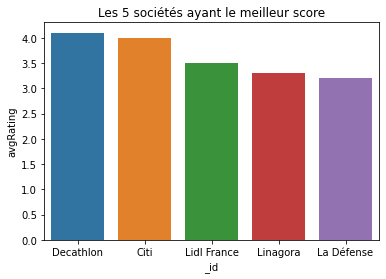

,_id,avgRating
0,Decathlon,4.1
1,Citi,4.0
2,Lidl France,3.5
3,Linagora,3.3
4,La Défense,3.2


In [14]:
cur = collection.aggregate([{"$group" :
                                 {"_id" : "$companyName",
                                  "avgRating" :
                                      {"$avg" :'$rating'}
                                  }},
                                {'$sort':{'avgRating':-1}},
                            {'$limit':5}])
df = pd.DataFrame(list(cur))
plt.title('Les 5 sociétés ayant le meilleur score')
sns.barplot(x='_id',y='avgRating',data=df)
plt.show()
df

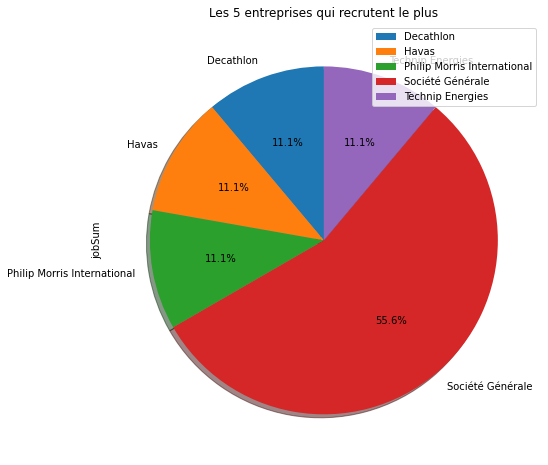

In [15]:
cur = collection.aggregate([{"$group" :
                                 {"_id" : "$companyName",
                                  "jobSum" :
                                      {"$sum" :1}
                                  }},
                                {'$sort':{'jobSum':-1}},
                            {'$limit':5}])

df_res = pd.DataFrame(list(cur))
colors = ['#f7a889', '#be7c89']
df_res.pivot_table('_id',index='_id',aggfunc='sum').plot(kind='pie',subplots=True, autopct='%1.1f%%', shadow=True,figsize=(8,8),startangle=90)
plt.legend(loc='upper right')
plt.title('Les 5 entreprises qui recrutent le plus')
plt.show()